In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'numpy'

In [12]:
df0 = pd.read_csv('run_seq.csv')
df1 = pd.read_csv('run_time.csv')

In [13]:
seq = df0["T"]
mpi = df1["T"] 

Calculating Average Sequential Timing:

In [14]:
seq_avg = 0.0;
for i in range(len(seq)):
    seq_avg += seq[i]
seq_avg = seq_avg/len(seq);
print(seq_avg)

0.1592674


Pre Processing Data for OpenMP run

In [15]:
mpi_2 = [];
mpi_4 = [];
mpi_8 = [];
mpi_16 = [];
mpi_32 = [];
mpi_64 = [];
z = 0;
num_procs = [2,4,8,16,32,64]
for i in num_procs:
    for j in range(i):
        if (i==2):
            mpi_2.append(mpi[z])
            z+=1
        if (i==4):
            mpi_4.append(mpi[z])
            z+=1
        if (i==8):
            mpi_8.append(mpi[z])
            z+=1
        if (i==16):
            mpi_16.append(mpi[z])
            z+=1
        if (i==32):
            mpi_32.append(mpi[z])
            z+=1
        if (i==64):
            mpi_64.append(mpi[z])
            z+=1

Calculating Average Time

In [16]:
mpi_2_ = np.sum(mpi_2)/len(mpi_2)
mpi_4_ = np.sum(mpi_4)/len(mpi_4)
mpi_8_ = np.sum(mpi_8)/len(mpi_8)
mpi_16_ = np.sum(mpi_16)/len(mpi_16)
mpi_32_ = np.sum(mpi_32)/len(mpi_32)
mpi_64_ = np.sum(mpi_64)/len(mpi_64)
time = [mpi_2_,mpi_4_,mpi_8_,mpi_16_,mpi_32_,mpi_64_]

Calculating Increase in Time,

In [17]:
speed_up = seq_avg/time

Plotting Histogram of Speed UP:

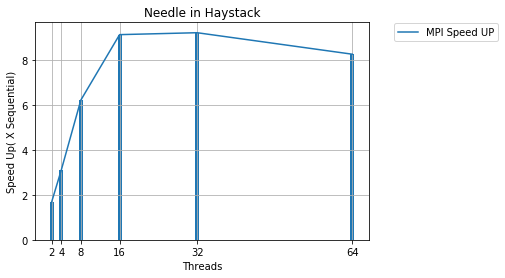

In [18]:
#x = [2,4,8,18,32]
plt.plot(num_procs,speed_up,label='MPI Speed UP')
plt.bar(num_procs,speed_up)
plt.grid()
lgd = plt.legend(loc='upper right',bbox_to_anchor=(1.4, 1.02))
plt.xticks(num_procs)
plt.xlabel('Threads')
plt.ylabel('Speed Up( X Sequential)')
plt.title('Needle in Haystack')
plt.savefig('mpi_speed_up.eps', format='eps', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

In [19]:
time_ = []
num_procs = [1,2,4,8,16,32,64]
for i in range(len(time)+1):
    if(i==0):
        time_.append(seq_avg)
    else:
        time_.append(time[i-1])

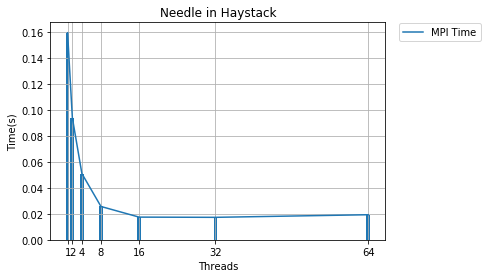

In [20]:
#x = [2,4,8,18,32]
plt.plot(num_procs,time_,label='MPI Time')
plt.bar(num_procs,time_)
plt.grid()
lgd = plt.legend(loc='upper right',bbox_to_anchor=(1.3, 1.02))
plt.xticks(num_procs)
plt.xlabel('Threads')
plt.ylabel('Time(s)')
plt.title('Needle in Haystack')
plt.savefig('mpi_time.eps', format='eps', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()